# **Milestone 2: Data Collection & Preparation**

# **Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

# **Read the Dataset**

In [2]:
df = pd.read_csv(r"/content/collegePlace.csv")
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


# **Handling missing value**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [4]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

# **Handling outliers**

<ipython-input-5-5a8c293dc427>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


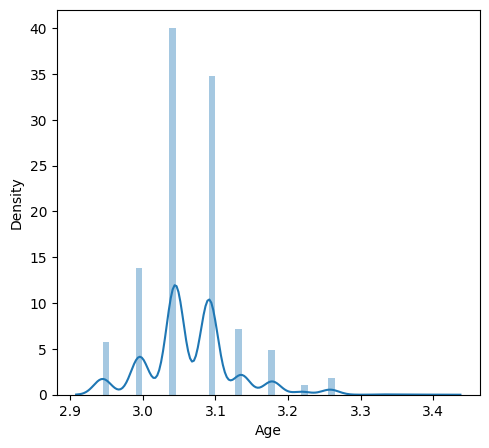

In [5]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)

transformationplot(np.log(df['Age']))


# **Handling Categorical Values**

In [6]:
df = df.replace(['Male'], [0])
df = df.replace(['Female'], [1])

df = df.replace(['Computer Science', 'Information Technology', 'Electronics And Communication', 'Mechanical', 'Electrical', 'Civil'], [0,1,2,3,4,5])
df.drop(['Hostel'], axis=1)

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1
1,21,1,0,0,7,1,1
2,22,1,1,1,6,0,1
3,21,0,1,0,8,1,1
4,22,0,3,0,8,0,1
...,...,...,...,...,...,...,...
2961,23,0,1,0,7,0,0
2962,23,0,3,1,7,0,0
2963,22,0,1,1,7,0,0
2964,22,0,0,1,7,0,0


# **Milestone 3: Exploratory Data Analysis**

# **Univariate analysis**

<ipython-input-7-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

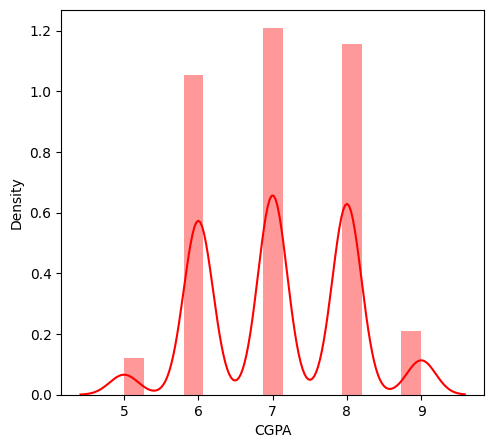

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<ipython-input-8-5e468beb8a0d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='r')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

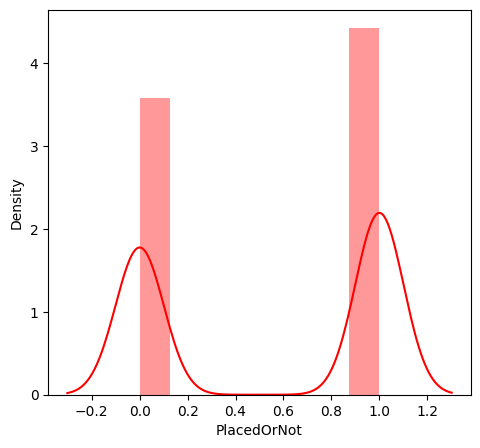

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='r')

# **Bivariate analysis**

In [9]:
df.drop_duplicates(inplace=True)
df.isna().sum()


Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

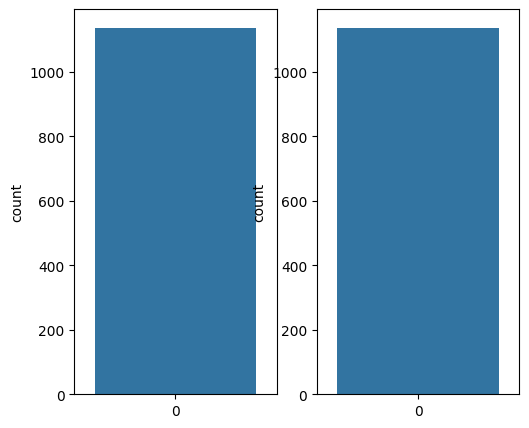

In [10]:
#ploting the count plot

plt.figure(figsize=(12,5))
plt.subplot(141)
sns.countplot(df['Gender'])
plt.subplot(142)
sns.countplot(df['Stream'])
plt.show()

# **Multivariate analysis**

<Axes: xlabel='PlacedOrNot', ylabel='count'>

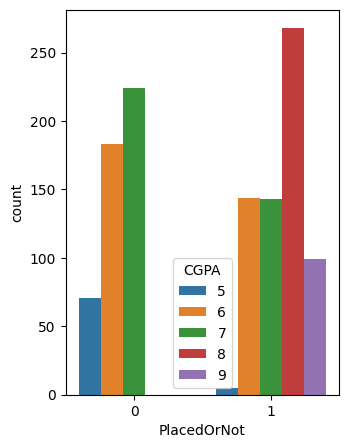

In [11]:

plt.figure(figsize=(12,5))
plt.subplot(131)
sns.countplot(data=df, x="PlacedOrNot", hue="CGPA")

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='PlacedOrNot', ylabel='CGPA'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 82.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


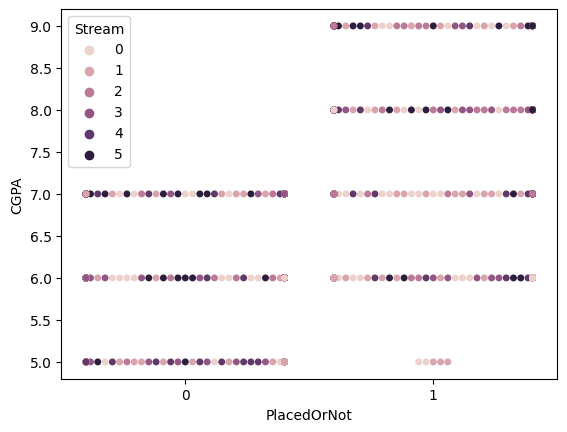

In [12]:
sns.swarmplot(x="PlacedOrNot", y="CGPA", hue="Stream", data=df)

# **Scaling the data**

In [13]:
sc = StandardScaler()
x_bal = sc.fit_transform(df)
x_bal

array([[ 0.20925372, -0.58649095, -0.10865065, ...,  1.40863479,
         1.54074243,  0.85166979],
       [-0.37388716,  1.70505616, -1.27408263, ...,  1.40863479,
         1.54074243,  0.85166979],
       [ 0.20925372,  1.70505616, -0.69136664, ..., -0.70990722,
        -0.64903775,  0.85166979],
       ...,
       [ 0.79239459,  1.70505616, -1.27408263, ..., -0.70990722,
         1.54074243,  0.85166979],
       [ 0.79239459, -0.58649095, -1.27408263, ..., -0.70990722,
         1.54074243, -1.174164  ],
       [ 0.79239459, -0.58649095,  0.47406534, ...,  1.40863479,
        -0.64903775, -1.174164  ]])

# **Splitting the Data into Train and Test**

In [14]:
# Split the data into training and testing sets
# Split the data into input features (X) and target variable (Y)
X = x_bal
Y = df['PlacedOrNot']
X_train, X_test, y_train, y_test = train_test_split(x_bal, df['PlacedOrNot'], test_size=0.2, random_state=42)


In [15]:
# Define the SVM classifier with a linear kernel
classifier = svm.SVC(kernel='linear')

# Train the classifier on the training data
classifier.fit(X_train, y_train)

# Predict the output for the training set
y_train_pred = classifier.predict(X_train)

# Calculate the accuracy of the model on the training data
training_accuracy = accuracy_score(y_train_pred, y_train)

# Print the training accuracy
print('Accuracy score of the training data:', training_accuracy)


Accuracy score of the training data: 1.0


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load iris dataset
iris = load_iris()

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

# Initialize dictionaries to store best k and best score for each type of dataset
best_k = {"Regular": 0}
best_score = {"Regular": 0}

# Loop through odd k values from 3 to 49 and calculate accuracy for each type of dataset
for k in range(3, 50, 2):
    # Regular dataset
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_test_pred = knn_temp.predict(X_test)
    score = metrics.accuracy_score(y_test, y_test_pred) * 100
    if score >= best_score["Regular"] and score < 100:
        best_score["Regular"] = score
        best_k["Regular"] = k
        
print("---Results---\nK: {}\nScore: {}".format(best_k, best_score))

# Instantiate the model with best k
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])

# Fit the model to the training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy score
test = metrics.accuracy_score(y_test, y_pred)


---Results---
K: {'Regular': 5}
Score: {'Regular': 97.77777777777777}


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [18]:
classifier = Sequential()
# add input layer and first hidden layer
classifier.add(layers.Dense(6, activation='relu', input_dim=6))
classifier.add(layers.Dropout(0.5))

# add 2nd hidden layer
classifier.add(layers.Dense(6, activation='relu'))
classifier.add(layers.Dropout(0.5))

# add final or output layer
classifier.add(layers.Dense(1, activation='sigmoid'))

In [19]:
# compile the model
loss_1 = tf.keras.losses.BinaryCrossentropy()
classifier.compile(optimizer='Adam', loss=loss_1, metrics=['accuracy'])

In [20]:
# Define X_train as a pandas DataFrame
X_train = data=[[1, 2, 3, 4, 5, 6], [2, 3, 4, 5, 6, 7], [3, 4, 5, 6, 7, 8]]
y_train = [0, 1, 0]
# Fit the model on X_train and Y_train
classifier.fit(X_train, y_train, batch_size=28, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0043 - accuracy: 0.6667
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0238 - accuracy: 0.3333
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4901 - accuracy: 0.6667
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6936 - accuracy: 0.3333
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 1.1814 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.4920 - accuracy: 0.6667
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6935 - accuracy: 0.3333
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 1.1664 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 0.6933 - accuracy: 0.3333
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6932 - accuracy: 0.3333
Epoch 11/100


In [21]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,2,1,8,1,1,1
1,21,1,0,0,7,1,1,1
2,22,1,1,1,6,0,0,1
3,21,0,1,0,8,0,1,1
4,22,0,3,0,8,1,0,1


#Milestone 5: Model Deployment
# ● Activity 1:Save the best model

In [22]:
import pickle
pickle.dump(knn, open("placement.pkl", 'wb'))
loaded_model = pickle.load(open('placement.pkl', 'rb'))


In [23]:
from flask import Flask, render_template, request
app = Flask(__name__)


In [24]:
import pickle
import joblib

model = pickle.load(open('placement.pkl', 'rb'))
ct = joblib.load('placement.pkl')


In [25]:
@app.route('/')
def hello():
  return render_template("index.html")